# Compare fitted atmospheric parameters

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 12th 2023
- last update : February 13th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE=20230118

In [6]:
filenames = [
"fitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv"
]

tags = ["OG550, REBIN2", "No Filter, REBIN2","No Filter, REBIN1"]
tags_col = ["r","k","grey"]

In [7]:
all_df = []
for filename in filenames:
    df = pd.read_csv(filename)
    #df = df[df["object"]=='HD185975']
    all_df.append(df)

In [8]:
NF =len(all_df)

In [9]:
all_df[0].head()

,Unnamed: 0,number,object,dateobs,refhour,airmass,pressure,temperature,humidity,filename,...,rotangle,d2ccd,number2,chi2,pwv,oz,grey,epwv,eoz,egrey
0,0,211,HD38666,2023-01-19T00:54:29.923007271Z,-3.087228,1.078479,0,0,0,2023011800211,...,0.228422,180.140554,211,1745.454172,4.658004,519.674416,1.028496,0.010015,1.108139,0.000098
1,1,220,HD38666,2023-01-19T00:59:57.036990263Z,-2.996363,1.069996,0,0,0,2023011800220,...,0.224652,180.157242,220,1872.243008,4.462744,550.000000,1.040973,0.009012,1.062737,0.000094
2,2,252,HD185975,2023-01-19T01:27:35.395008735Z,-2.535708,2.058078,0,0,0,2023011800252,...,0.436762,180.106956,252,133.152708,3.964410,364.051875,0.999157,0.016082,2.028326,0.000278
3,3,253,HD185975,2023-01-19T01:28:18.197490329Z,-2.523818,2.058515,0,0,0,2023011800253,...,0.442411,180.053015,253,99.027193,3.806787,387.071329,1.009503,0.018347,2.301276,0.000319
4,4,267,HD38666,2023-01-19T01:40:08.188998340Z,-2.326598,1.023673,0,0,0,2023011800267,...,0.189878,179.415913,267,1280.352635,4.296405,550.000000,1.042763,0.011698,1.443174,0.000121


In [10]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_76942/1489658469.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


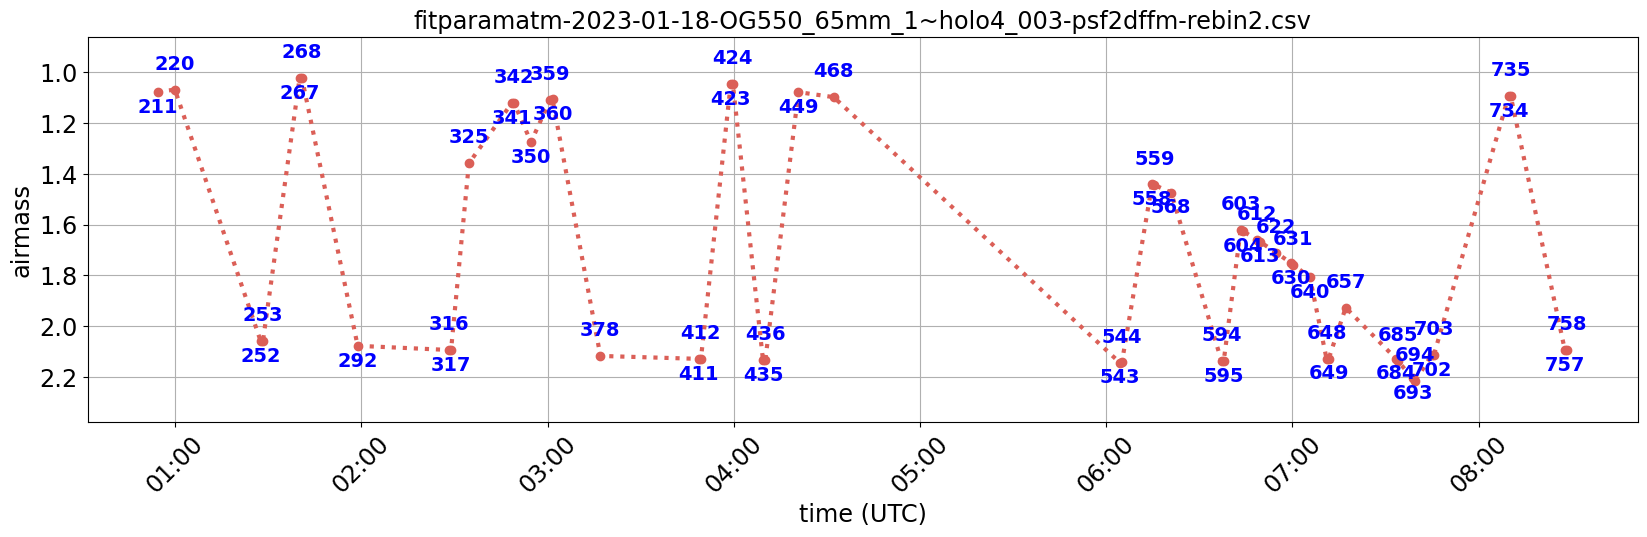

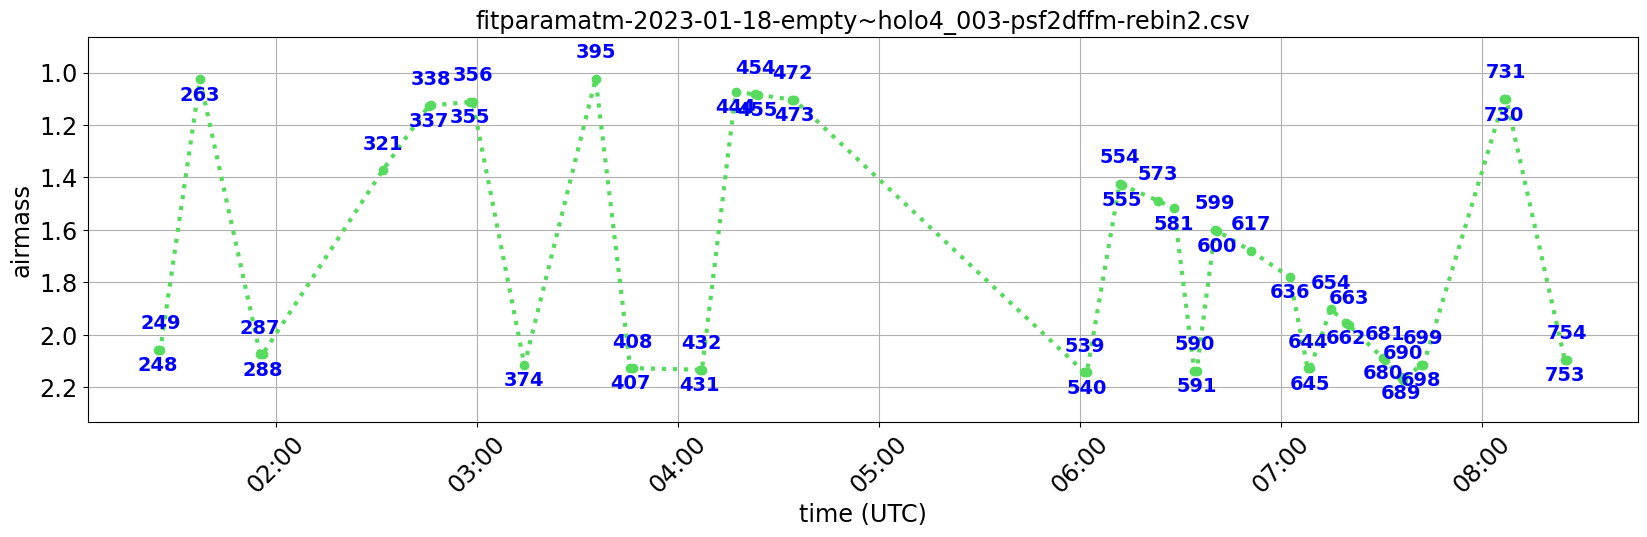

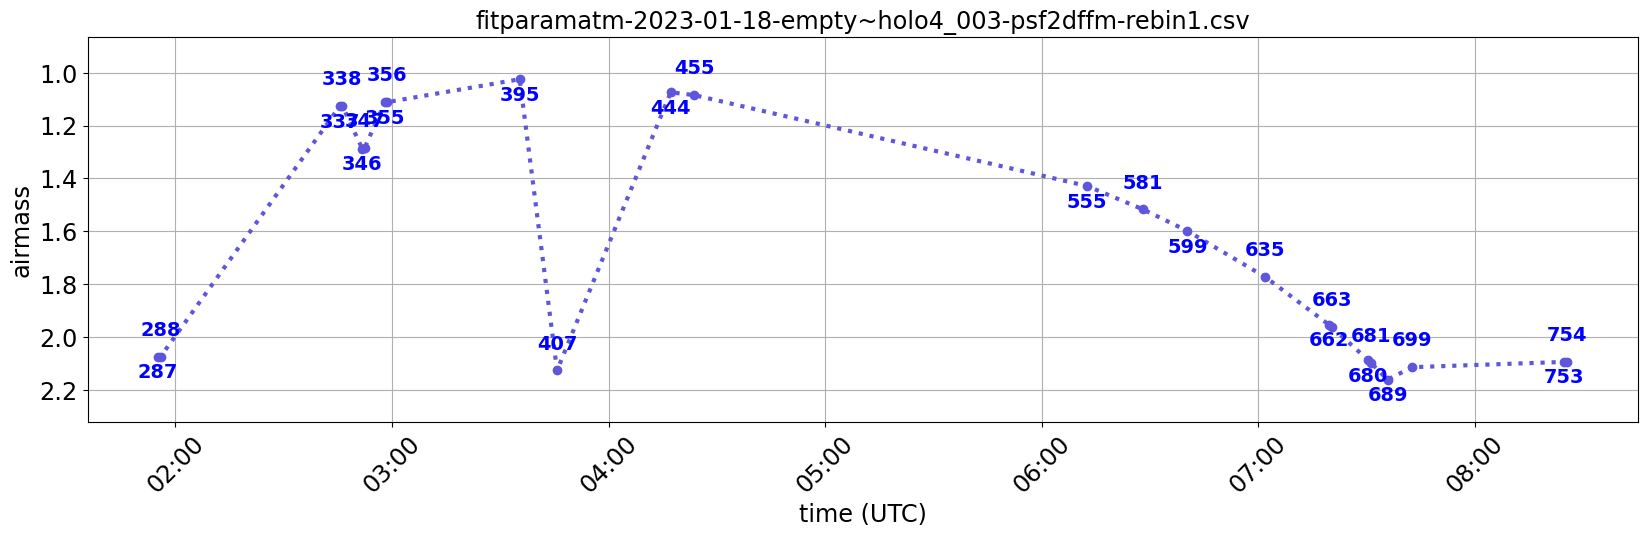

In [11]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    airmasses = infos['airmass'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)

    

    y_shift= 0.08

  
    ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("airmass")
    ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    

In [12]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_76942/207474688.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


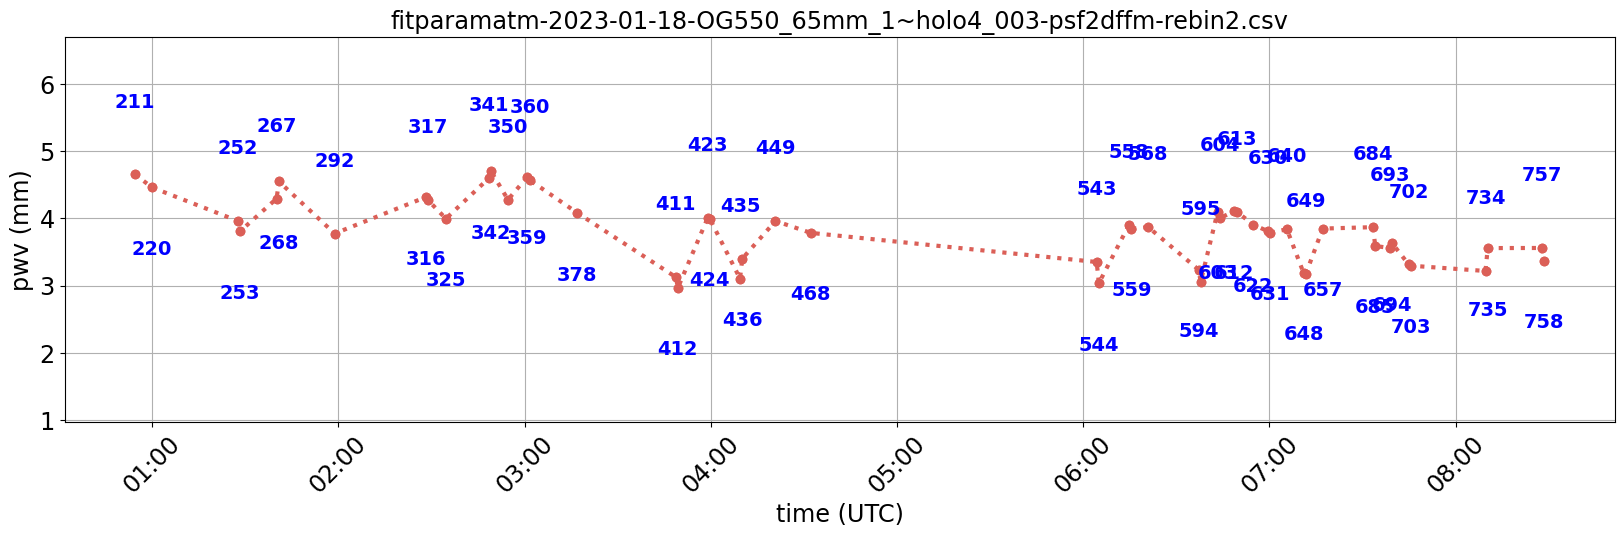

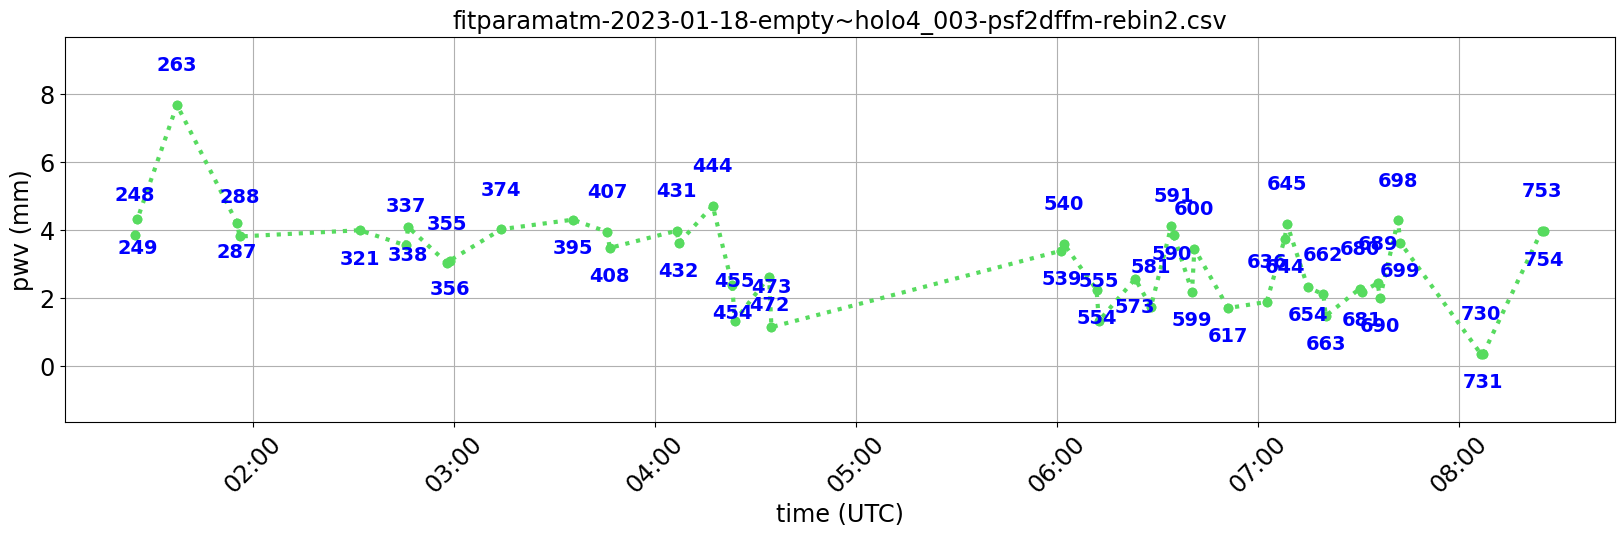

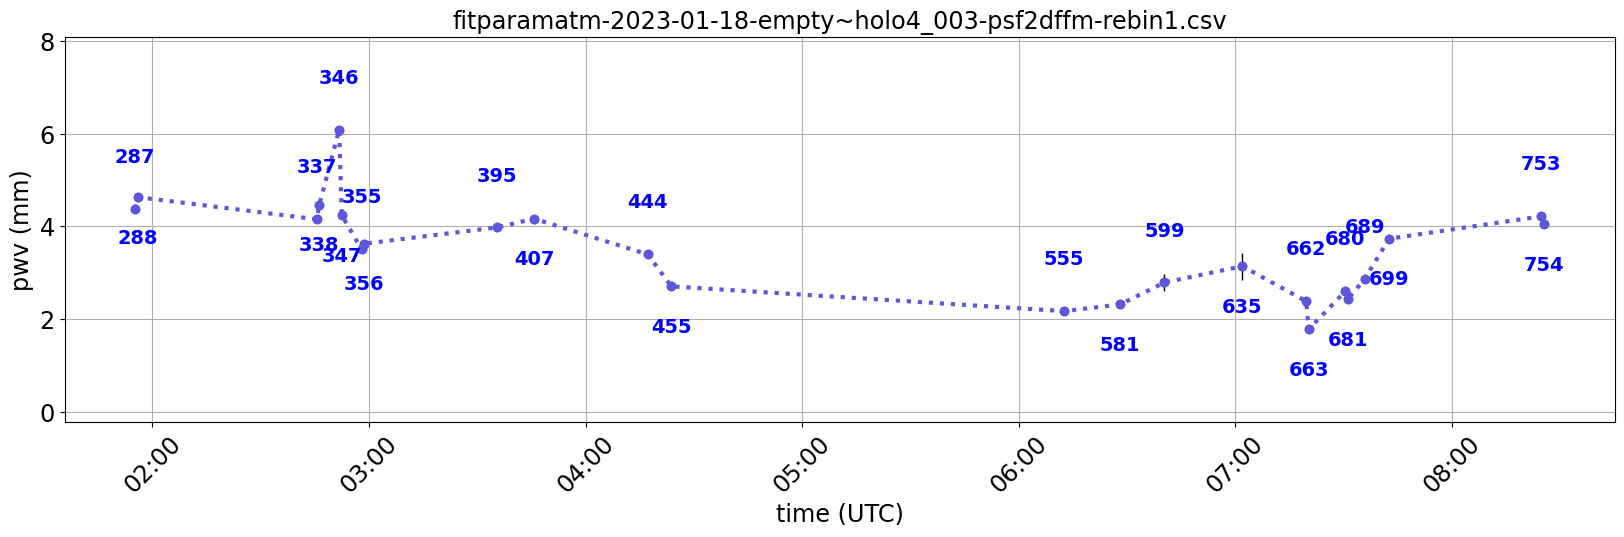

In [13]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv'].values
    epwv= infos['epwv'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_76942/3632663302.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=tags_col[idx],lw=3)


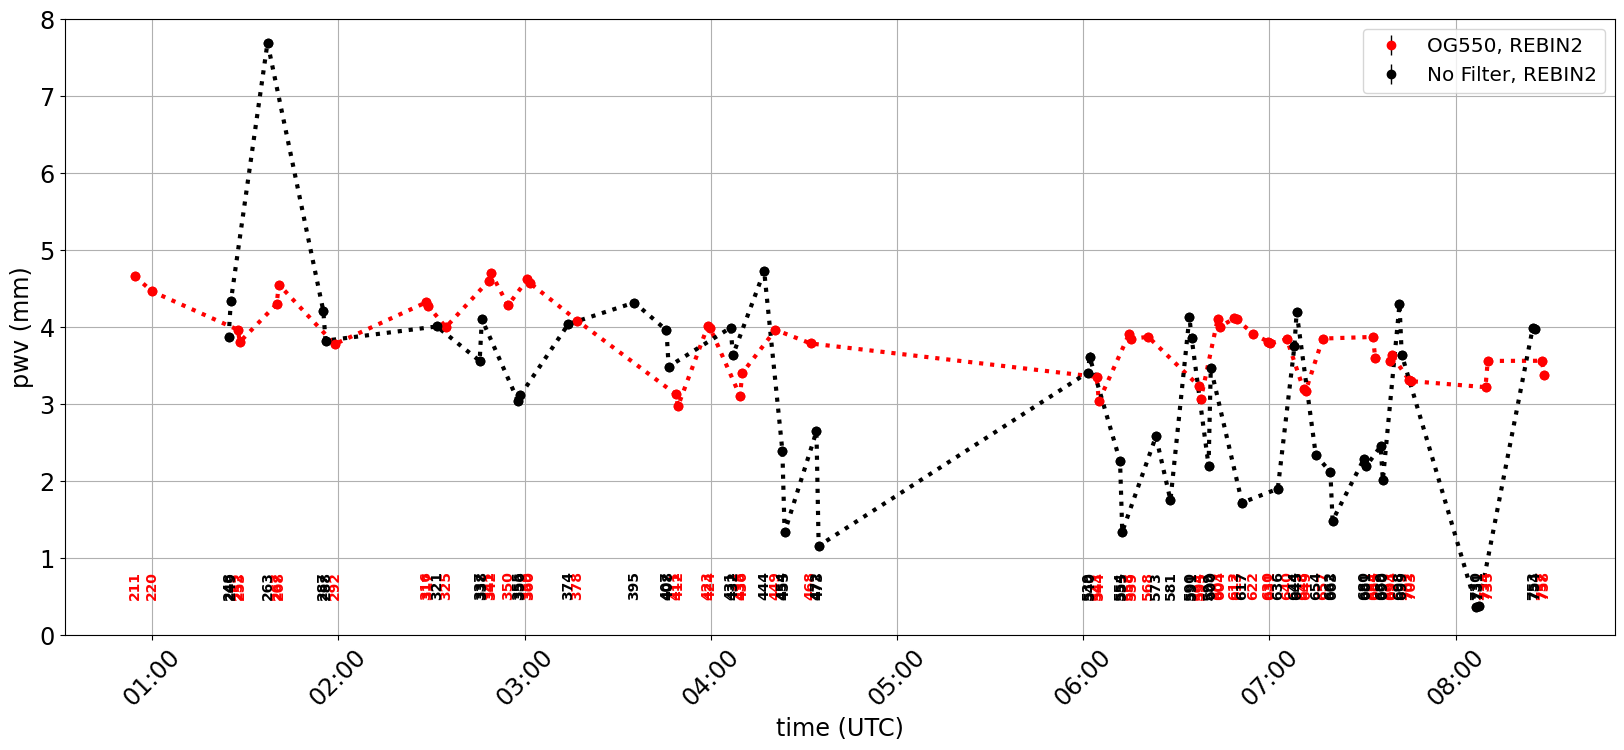

In [14]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx==2:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv'].values
    epwv= infos['epwv'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=tags_col[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=tags_col[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=tags_col[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,8) 
plt.legend(loc="upper right")
plt.show()

    
    

In [15]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_76942/4139682438.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)


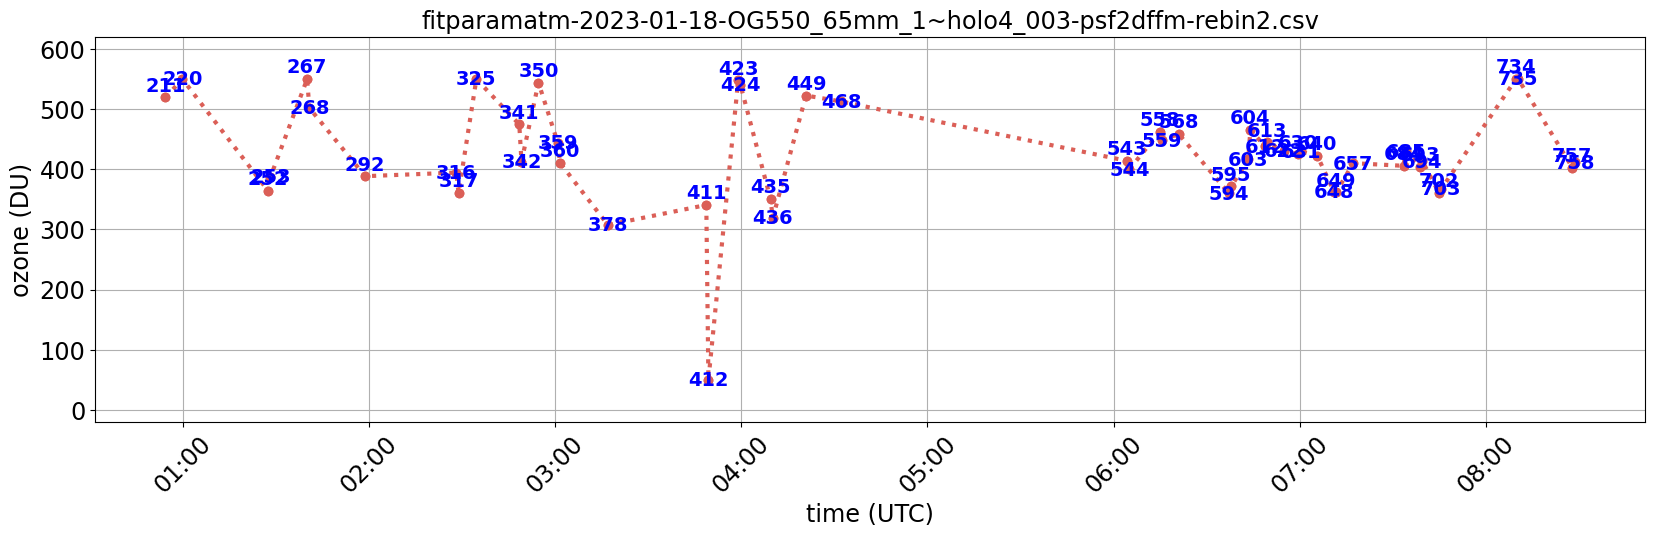

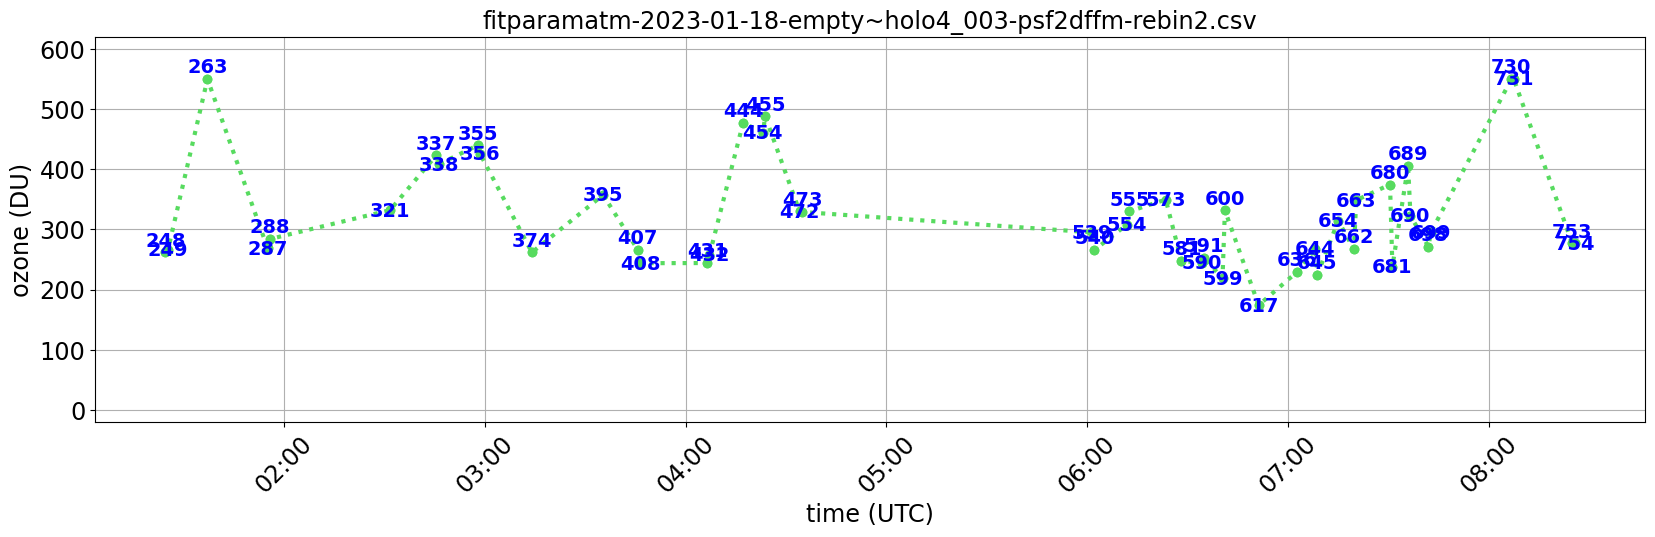

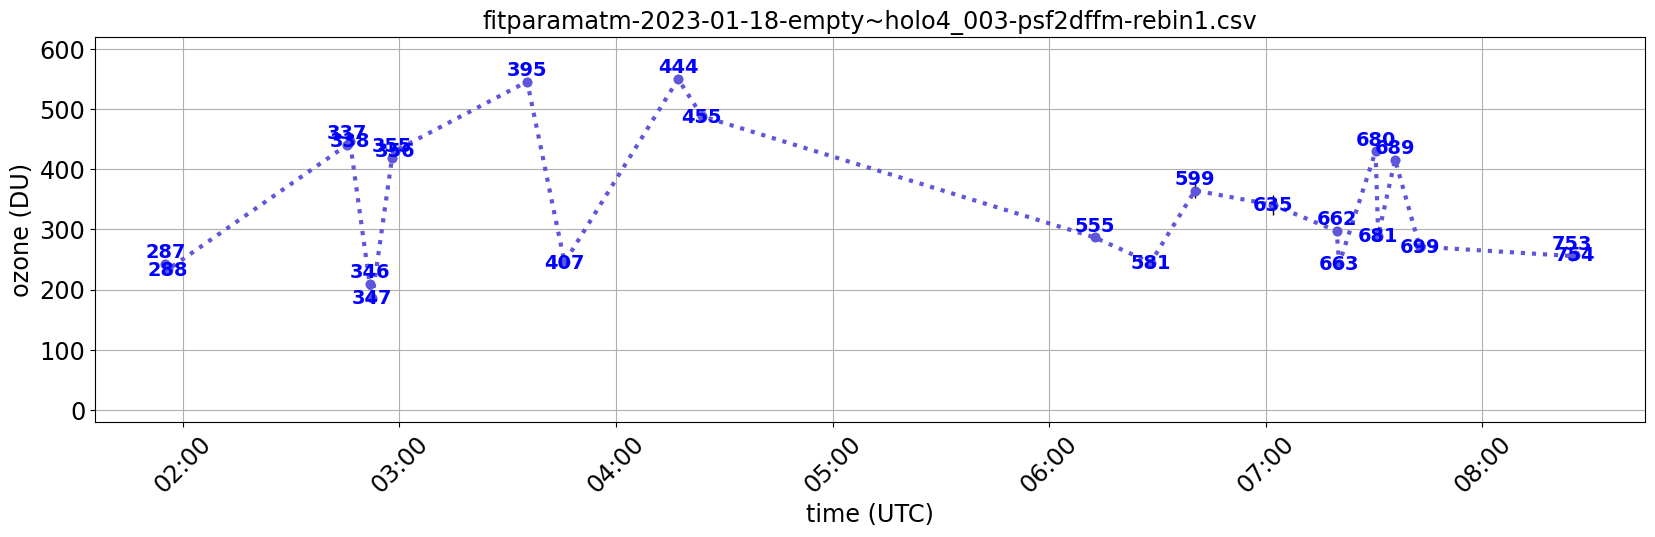

In [16]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    oz= infos['oz'].values
    eoz= infos['eoz'].values
    

    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 10

  
    ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("ozone (DU)")
    ax.set_ylim(0-2*y_shift,600.+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], oz[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    